# Kemal Demirel

### Gerekli kütüphaneler import edilir.

In [3]:
import cv2
from PIL import Image
import os
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

### Resimler üzerinde görüntü işleme uygulanır.

Resim belirli bir ölçüye getirilir.

Daha sonra grayscale hale dönüştürülür.

In [4]:
def preprocess_image(image):
    fixed_size = (256, 256)
    image = cv2.resize(image, fixed_size )
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

Bütün directory traverse edilir ve resimlere görüntü işleme uygulanır

In [5]:
def traverse_folder_to_preprocess(path):
    images = []
    for file in os.listdir(path):
        image = cv2.imread(os.path.join(path, file))
        image = preprocess_image(image)
        images.append(image)
    return images

Bütün directory üzerinde gezilir ve ilgili resimler orijinal hali ile array'e kaydedilip return edilir.

In [6]:
def get_all_images(path):
    images = []
    for file in os.listdir(path):
        image = cv2.imread(os.path.join(path, file))
        images.append(image)
    return images

Pokemon preprocessed resimler array'e kaydedilir

In [7]:
# Pokemon resimlerinin bulunduğu path
pokemon_path = os.getcwd()+"/pokemon/"
pokemon_preprocessed_images = traverse_folder_to_preprocess(pokemon_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [8]:
# en çok benzer 3 resim bulunduktan sonra resimlerin grayscale hali yerine, orijinal halini göstermek için kullanılacaktır.
pokemon_upprocessed_images = get_all_images(pokemon_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Query preprocessed resimler array'e kaydedilir

In [9]:
# QI resimlerinin bulunduğu path
qi_path = os.getcwd()+"/QI/"
qi_preprocessed_images = traverse_folder_to_preprocess(qi_path)

libpng warning: iCCP: known incorrect sRGB profile


In [10]:
# en çok benzer 3 resim bulunduktan sonra resimlerin grayscale hali yerine, orijinal halini göstermek için kullanılacaktır.
qi_unprocessed_images = get_all_images(qi_path)

libpng warning: iCCP: known incorrect sRGB profile


SIFT işlemleri için sift yaratılır

In [11]:
sift = cv2.SIFT_create()

Pokemon resimlerinin feature'ları sift algoritması ile çıkarılır ve dataset_features array'i içerisine kaydedilir.

In [12]:
dataset_features = []
for image in pokemon_preprocessed_images:
    kp, desc = sift.detectAndCompute(image, None)
    dataset_features.append(desc)

# SIFT featureları üzerinde K-means kümelendirme algoritması çalıştırılır ve visual vocabulary yaratılır.

### Öbek sayısı 50 olarak belirlenmiştir

In [13]:
num_clusters = 50

In [14]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
sift_features = np.vstack(dataset_features)

k-means clustering algoritması 'sift_features' üzerinde uygulayarak benzer SIFT özellikleri gruplara ayrılacaktır. Elde edilen kümeler, görüntü işleme ve bilgisayarla görü için kullanılabilir hale gelir. Burada da bizim Query resimlerimize en çok benzeyen 3 resmi bulmada kullanılacaktır.

Eğitim gerçekleştirilir

In [15]:
kmeans.fit(sift_features)

KMeans(n_clusters=50, random_state=0)

Visual vocabulary oluşturulur.

visual_vocabulary benzer resmi bulmamızı sağlayan patterları içerir.

In [16]:
visual_vocabulary = kmeans.cluster_centers_

#### Visual vocabulary uzunluğu 50'dir

In [17]:
len(visual_vocabulary)

50

## Her resim için feature histogramları hesaplandı. Histogramda kullanılan 'bin' sayısı, resmin temsil edilmesinde önemlidir. Bu sayı artarsa histogram hassasiyeti artmaktadır fakat bu durumda da hesaplama süresinde artış olur. Hassasiyet artarken, işlem süresi uzadığı için dengeli bir seçim yapılması gerekiyor. 

## Çalışmada 50 adet 'bin' kullanılmıştır.

## 'Bin' sayısı az iken daha az veri gerekir ve daha az detaylı gösterir. 

## 'Bin' saysısı fazla iken daha fazla veri gerekir ve daha detaylı sonuçlar verir.

## 'Bin' sayısını optimal seçmek önemlidir.

# 'bin' sayısını optimal belirlemek için, farklı 'num_clusters' denemeleri yapıldı ve accuracy hesaplaması yapıldı. En iyi sonuç öbek sayısı 50 olduğu zaman elde edildi.

### Query resmi ile benzer resimleri bulmak için, BOF histogram oluşturulmuştur ve diğer resimlerin histogramları ile kosinüs benzerliği kullanılarak karşılaştırılmıştır.

### num_clusters değişkeni 50 olarak belirlenmişti. Bu da histogramdaki bin sayısına eşit olmaktadır.

In [18]:
def create_bof_histogram(image_features, visual_vocabulary):
    num_clusters = visual_vocabulary.shape[0]
    histogram = np.zeros(num_clusters)
    distances = cosine_similarity(image_features, visual_vocabulary)
    nearest_cluster_indices = np.argmax(distances, axis=1)
    for index in nearest_cluster_indices:
        histogram[index] += 1
    return histogram

Bof histogramları 'bof_histograms' arrayine kaydedilir

Her resim için oluşturulmuş feature histogramları, visual vocabulary içerisindeki kelimeler ile eşleştirilerek, her resmi temsel eden bir feature vektörü elde edilir.

In [19]:
bof_histograms = []
for img_features in dataset_features:
    histogram = create_bof_histogram(img_features, visual_vocabulary)
    bof_histograms.append(histogram)

En çok benzeyen 3 resmi bulabilmek için gerekli feature elde etme, histogram oluşturma ve kosinüs benzerliği uygulama işlemleri yapılır.

In [20]:
similarities = []
for query_img in qi_preprocessed_images:
    query_features = sift.detectAndCompute(query_img, None)[1]
    query_histogram = create_bof_histogram(query_features, visual_vocabulary)
    query_histogram = query_histogram.reshape(1, -1)
    similarity = cosine_similarity(query_histogram, bof_histograms)
    similarities.append(similarity)

# İlgili Query resmine en çok benzeyen 3 resim bulunur.

In [21]:
query_images = []
similar_images = []
for i, similarity in enumerate(similarities):
    ranking = np.argsort(-similarity)
    top3_indices = ranking[0][:3]
    query_images.append(qi_unprocessed_images[i])
    for index in top3_indices:
        similar_images.append([pokemon_upprocessed_images[index], similarity[0][index]])

# İlk sütünde Query resmi ve sağa doğru ranking azalacak şekilde en çok benzeyen 3 resim bulunmaktadır.

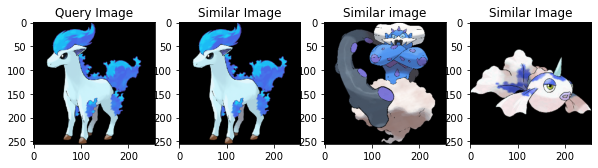

In [22]:
index = 0
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image)
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1)
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2)
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3)
axs[3].set_title('Similar Image')
plt.show()

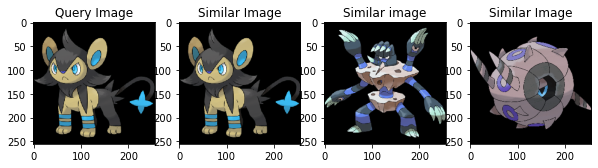

In [23]:
index = 1
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image)
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1)
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2)
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3)
axs[3].set_title('Similar Image')
plt.show()

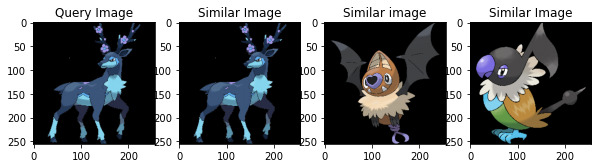

In [24]:
index = 2
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image)
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1)
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2)
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3)
axs[3].set_title('Similar Image')
plt.show()

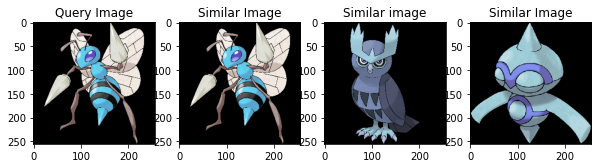

In [25]:
index = 3
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image)
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1)
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2)
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3)
axs[3].set_title('Similar Image')
plt.show()

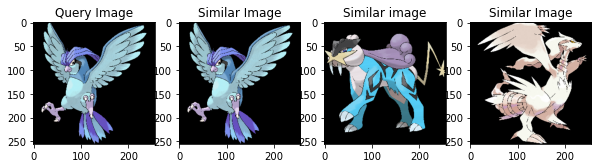

In [26]:
index = 4
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image)
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1)
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2)
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3)
axs[3].set_title('Similar Image')
plt.show()

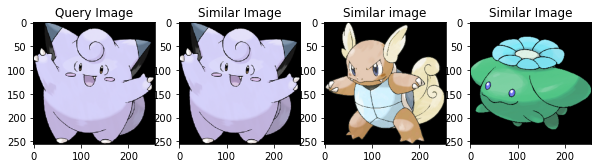

In [27]:
index = 5
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image)
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1)
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2)
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3)
axs[3].set_title('Similar Image')
plt.show()

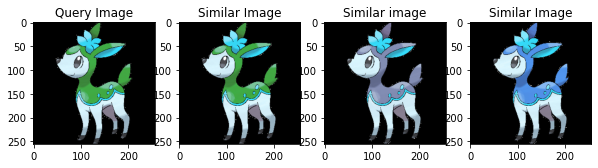

In [28]:
index = 6
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image)
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1)
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2)
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3)
axs[3].set_title('Similar Image')
plt.show()

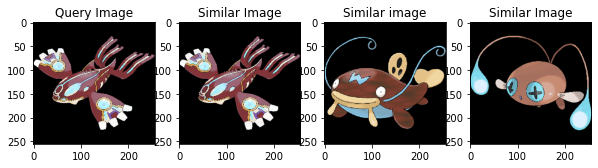

In [29]:
index = 7
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image)
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1)
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2)
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3)
axs[3].set_title('Similar Image')
plt.show()